# Kaggle Titanic Competition
Karen Xiao

5/6/2015

##Loading in Data
First, we will read in the data file titanic.csv and store it as a Numpy array. We will be using the csv package to read and write csv files and the Numpy package for some of its array and other functions.

In [4]:
import csv as csv 
import numpy as np

raw_csv = csv.reader(open('titanic_full.csv', 'rb')) 

# skip the header
header = raw_csv.next()  # The next() command just skips the 

# read in rows from the raw_csv file and store in data variable         
data=[]                        
for row in raw_csv:     
    data.append(row)       
data = np.array(data) 

print header
print data[0]

['survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'pclass', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest']
['1' 'Allen, Miss. Elisabeth Walton' 'female' '29' '0' '0' '1' '24160'
 '211.3375' 'B5' 'S' '2' '' 'St Louis, MO']


##Plotting the Data
Now that we have the data loaded in, we can plot some initial data just to get a sense of what we have. Here we will use a plotting library called Matplotlib As a first hypothesis, we might look at the survival chances based on gender. 

Percentage of women who survived: 0.727467811159
Percentage of men who survived: 0.190984578885


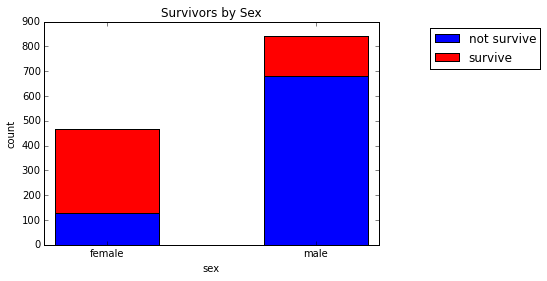

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

# define "mask" variables that can be applied on the data to filter on females in column 2
female_mask = data[0::,2] == "female"
male_mask = data[0::,2] != "female"

women = data[female_mask,0].astype(np.float)     
men = data[male_mask,0].astype(np.float)

# calculate percentages
print "Percentage of women who survived: %s" % (np.sum(women) / np.size(women))
print "Percentage of men who survived: %s" % (np.sum(men) / np.size(men))

# plot the data
width = .5
index = np.arange(2) + .25
survived = [np.sum(women), np.sum(men)]
died = [np.size(women) - np.sum(women), np.size(men) - np.sum(men)] 

plot_died = plt.bar(index, died, width, color='b')
plot_survived = plt.bar(index, survived, width, color='r', bottom=died)   

plt.title('Survivors by Sex')
plt.ylabel('count')
plt.xlabel('sex')
plt.xticks(index+.25, ['female', 'male'])
plt.legend((plot_died, plot_survived), ('not survive', 'survive'), bbox_to_anchor=(1.5, 1))

plt.show()

##A Simple Gender-based Model
Now that we've looked at this dimension of the data, we can create a very basic model to predict whether a passenger will survive purely based off of their gender. Clearly, this model is not going to be particularly accurate, but it works as an initial exercise.

We will go through a full exercise of reading in the data, applying our model, and outputting our prediction to a csv file in a format ready for submission to Kaggle. Unlike before, instead of using a Numpy array to store and manipulate our data, we will be using a Pandas DataFrame, which has some more sophisticated capabilities. 

In [44]:
import pandas as pd

# read in the data using the Pandas .read_csv function
df = pd.read_csv('titanic_full.csv', header=0)

# some useful commands to play around with the data
# df.dtypes
# df.info()
# df.describe

predictions = df.sex.map(lambda x: 1 if x=="female" else 0)
predictions.to_csv('genderpredictions.csv')